In [3]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError
from urllib.request import urlopen
%matplotlib inline

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [4]:
as_df = pd.read_csv('airline_customer_satisfaction.csv')

In [5]:
as_df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [5]:
as_df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [6]:
#set those null values to zero

In [7]:
as_df['Arrival Delay in Minutes'] = as_df['Arrival Delay in Minutes'].fillna(0)

In [8]:
as_df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
as_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [10]:
#Data Exploration

In [11]:
as_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [12]:
#types of variables

In [13]:
print("Here's the data types of various variables:\n", as_df.dtypes)

Here's the data types of various variables:
 Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanlines

In [14]:
# Some summary of the data
as_df.describe()
#as_df.describe().T

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25976.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.693756
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.466787
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [15]:
# checking for class imbalence

In [16]:
as_df['satisfaction'].value_counts()

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

In [17]:
# To see the perecentage of each class

as_df['satisfaction'].value_counts()/len(as_df)

neutral or dissatisfied    0.561018
satisfied                  0.438982
Name: satisfaction, dtype: float64

In [18]:
#this data set does not suffer from class imbalance

In [19]:
as_df['Gender'].value_counts()

Female    13172
Male      12804
Name: Gender, dtype: int64

In [20]:
as_df['Customer Type'].value_counts()

Loyal Customer       21177
disloyal Customer     4799
Name: Customer Type, dtype: int64

In [21]:
as_df['Type of Travel'].value_counts()

Business travel    18038
Personal Travel     7938
Name: Type of Travel, dtype: int64

In [22]:
as_df['Class'].value_counts()

Business    12495
Eco         11564
Eco Plus     1917
Name: Class, dtype: int64

In [23]:
# checking for colinearity
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(as_df['Flight Distance'],as_df['Age']))

Chi2ContingencyResult(statistic=243983.9592985009, pvalue=0.034998194666904604, dof=242720, expected_freq=array([[0.01420542, 0.01813212, 0.01928703, ..., 0.00115491, 0.00369572,
        0.00092393],
       [0.01420542, 0.01813212, 0.01928703, ..., 0.00115491, 0.00369572,
        0.00092393],
       [0.15152448, 0.1934093 , 0.20572836, ..., 0.01231906, 0.039421  ,
        0.00985525],
       ...,
       [0.00473514, 0.00604404, 0.00642901, ..., 0.00038497, 0.00123191,
        0.00030798],
       [0.02841084, 0.03626424, 0.03857407, ..., 0.00230982, 0.00739144,
        0.00184786],
       [0.01894056, 0.02417616, 0.02571605, ..., 0.00153988, 0.00492763,
        0.00123191]]))

In [24]:
chi2_contingency(pd.crosstab(as_df['Gender'],as_df['Age']))

Chi2ContingencyResult(statistic=72.12576341421648, pvalue=0.5399986963083715, dof=74, expected_freq=array([[ 62.37126578,  79.61210348,  84.6829381 ,  70.48460117,
         80.6262704 ,  80.6262704 ,  87.72543887,  77.58376963,
         95.33169079, 130.32044965, 122.20711426, 124.23544811,
        104.4591931 , 181.53587927, 200.29796735, 294.10840776,
        298.67215892, 282.9525716 , 361.55050816, 270.27548506,
        301.71465969, 223.62380659, 255.06298121, 248.97797967,
        202.83338466, 181.53587927, 244.92131198, 225.65214044,
        240.86464429, 277.88173699, 286.50215584, 282.44548814,
        366.62134278, 321.99799815, 320.98383123, 283.96673853,
        317.434247  , 315.40591315, 304.25007699, 284.98090545,
        283.45965507, 294.10840776, 285.48798891, 254.55589775,
        255.06298121, 273.82506929, 239.85047736, 271.28965199,
        239.85047736, 229.20172467, 240.86464429, 227.17339082,
        234.27255929, 211.96088697, 121.19294734, 115.61502926,
    

In [25]:
from sklearn.preprocessing import OneHotEncoder
Gender_encoder = OneHotEncoder()
from sklearn.preprocessing import OneHotEncoder
import numpy as np

Gender_encoder = OneHotEncoder()
Gender_reshaped = np.array(as_df['Gender']).reshape(-1, 1)
Gender_values = Gender_encoder.fit_transform(Gender_reshaped)

print(as_df['Gender'][:5])
print()
print(Gender_values.toarray()[:5])
print()
print(Gender_encoder.inverse_transform(Gender_values)[:5])

0    Female
1    Female
2      Male
3      Male
4    Female
Name: Gender, dtype: object

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]

[['Female']
 ['Female']
 ['Male']
 ['Male']
 ['Female']]


In [26]:
TypeOfTravel_encoder = OneHotEncoder()
Type_reshaped = np.array(as_df['Type of Travel']).reshape(-1, 1)
TypeOfTravel_values = TypeOfTravel_encoder.fit_transform(Type_reshaped)
print(as_df['Type of Travel'][:5])
print()
print(TypeOfTravel_values.toarray()[:5])
print()
print(TypeOfTravel_encoder.inverse_transform(TypeOfTravel_values)[:5])

0    Business travel
1    Business travel
2    Business travel
3    Business travel
4    Business travel
Name: Type of Travel, dtype: object

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]

[['Business travel']
 ['Business travel']
 ['Business travel']
 ['Business travel']
 ['Business travel']]


In [27]:
CustomerType_encoder = OneHotEncoder()
Customer_reshaped = np.array(as_df['Customer Type']).reshape(-1, 1)
CustomerType_values = CustomerType_encoder.fit_transform(Customer_reshaped)

print(as_df['Customer Type'][:5])
print()
print(CustomerType_values.toarray()[:5])
print()
print(CustomerType_encoder.inverse_transform(CustomerType_values)[:5])

0       Loyal Customer
1       Loyal Customer
2    disloyal Customer
3       Loyal Customer
4       Loyal Customer
Name: Customer Type, dtype: object

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]

[['Loyal Customer']
 ['Loyal Customer']
 ['disloyal Customer']
 ['Loyal Customer']
 ['Loyal Customer']]


In [28]:
ClassType_encoder = OneHotEncoder()
ClassType_reshaped = np.array(as_df['Class']).reshape(-1, 1)
ClassType_values = ClassType_encoder.fit_transform(ClassType_reshaped)

print(as_df['Class'][:5])
print()
print(ClassType_values.toarray()[:5])
print()
print(ClassType_encoder.inverse_transform(ClassType_values)[:5])

0         Eco
1    Business
2         Eco
3    Business
4         Eco
Name: Class, dtype: object

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]

[['Eco']
 ['Business']
 ['Eco']
 ['Business']
 ['Eco']]


In [29]:
Gender_encoder_df = pd.DataFrame(Gender_encoder.fit_transform(as_df[['Gender']]).toarray())
final_as_df = as_df.join(Gender_encoder_df)
final_as_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,0,1
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied,1.0,0.0
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied,1.0,0.0
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,0.0,1.0
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied,0.0,1.0
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied,1.0,0.0


# CREATING TEST AND TRAIN DATASETS

In [30]:
finalpdframe = final_as_df.drop(labels=['Gender','Customer Type','Type of Travel','Class'], axis=1)
finalpdframe.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,0,1
0,0,19556,52,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied,1.0,0.0
1,1,90035,36,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied,1.0,0.0
2,2,12360,20,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,0.0,1.0
3,3,77959,44,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied,0.0,1.0
4,4,36875,49,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied,1.0,0.0


In [31]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
finalpdframe['satisfaction'] = labelencoder.fit_transform(finalpdframe['satisfaction'])
X =finalpdframe.iloc[:, finalpdframe.columns != 'satisfaction']
y =finalpdframe.iloc[:, finalpdframe.columns == 'satisfaction']
#y =finalpdframe.iloc[:, as_df.columns == 'satisfaction']
#X =finalpdframe.iloc [:, 1:]
#y = finalpdframe.iloc [:, 0]

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
X.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,0,1
0,0,19556,52,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1.0,0.0
1,1,90035,36,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1.0,0.0
2,2,12360,20,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0.0,1.0
3,3,77959,44,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,0.0,1.0
4,4,36875,49,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1.0,0.0


# FITTING RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Convert column names to string format
X_train.columns = X_train.columns.astype(str)

rf = RandomForestClassifier(random_state=2, max_depth=3)
rf.fit(X_train, y_train.values.ravel())


RandomForestClassifier(max_depth=3, random_state=2)

In [33]:
# Save the model
import pickle
pickle.dump(rf,open("rf_model",'wb'))

In [34]:
# Load the model
rf_loaded = pickle.load(open('rf_model', 'rb'))


In [35]:
# Convert column names to string format for X_test
X_test.columns = X_test.columns.astype(str)
y_pred1 = rf_loaded.predict(X_test)
y_pred = rf.predict(X_test)


In [36]:
print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))  

print(accuracy_score(y_test, y_pred)) 

print(rf.score(X_test, y_test))

[[2622  343]
 [ 473 1758]]
0.8429561200923787
0.8429561200923787


In [37]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8361522408073272

In [38]:
rf.feature_importances_

array([0.        , 0.00111332, 0.0094939 , 0.04526693, 0.16612661,
       0.01193094, 0.02592317, 0.00534468, 0.00948302, 0.2494153 ,
       0.10843939, 0.16400905, 0.05505949, 0.07786444, 0.0191683 ,
       0.01136467, 0.01620423, 0.02216095, 0.000363  , 0.00060802,
       0.00038238, 0.00027821])

In [39]:
#VARIABLE IMPORTANCE
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Online boarding,0.249415
Inflight wifi service,0.166127
Inflight entertainment,0.164009
Seat comfort,0.108439
Leg room service,0.077864
On-board service,0.055059
Flight Distance,0.045267
Ease of Online booking,0.025923
Cleanliness,0.022161
Baggage handling,0.019168


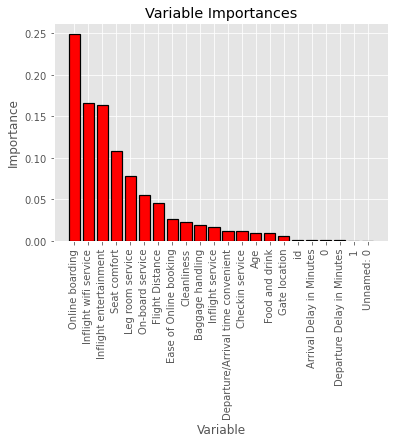

In [40]:
x_values = list(range(len(feature_importances['importance'])))
plt.bar(x_values, feature_importances['importance'], orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_importances.index, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

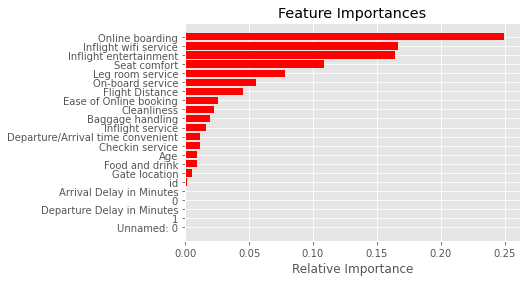

In [41]:
### Another way 

features = X.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

# TUNING PARAMETER

In [42]:
#N_estimators

Text(0.5, 0, 'n_estimators')

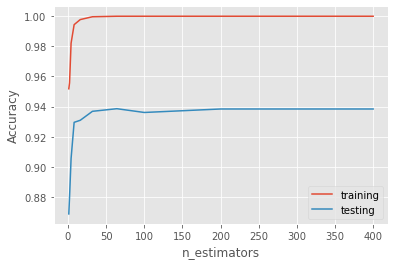

In [43]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 400]
tr_accuracy = []
tst_accuracy = []

tr_auc = []
tst_auc = []
for est in n_estimators:
    rf = RandomForestClassifier(n_estimators= est)
    rf.fit(X_train,y_train.values.ravel())
    tr_pred = rf.predict(X_train)
    tr_accuracy.append(accuracy_score(y_train, tr_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, tr_pred)
    roc_auc_tr = auc(false_positive_rate, true_positive_rate)
    tr_auc.append(roc_auc_tr)
    
    
    tst_pred = rf.predict(X_test)
    tst_accuracy.append(accuracy_score(y_test, tst_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tst_pred)
    roc_auc_tst = auc(false_positive_rate, true_positive_rate)
    tst_auc.append(roc_auc_tst)

line_1, = plt.plot(n_estimators, tr_accuracy, label='training')
line_2, = plt.plot(n_estimators, tst_accuracy, label='testing')
plt.legend(handles=[line_1, line_2])
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')

Text(0.5, 0, 'n_estimators')

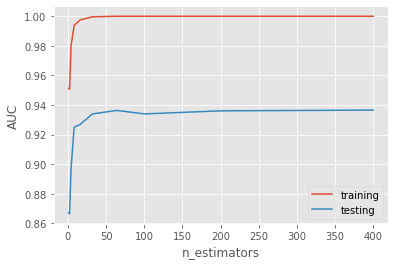

In [44]:
line_1, = plt.plot(n_estimators, tr_auc, label='training')
line_2, = plt.plot(n_estimators, tst_auc, label='testing')
plt.legend(handles=[line_1, line_2])
plt.ylabel('AUC')
plt.xlabel('n_estimators')

In [48]:
#max_depth

Text(0.5, 0, 'Tree Depth')

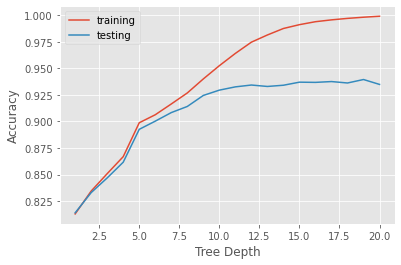

In [49]:
max_depths = np.linspace(1, 20, 20, endpoint=True, dtype=int)  # Ensure max_depths are integers

tr_accuracy = []
tst_accuracy = []

tr_auc = []
tst_auc = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth)
    rf.fit(X_train, y_train.values.ravel())
    tr_pred = rf.predict(X_train)
    tr_accuracy.append(accuracy_score(y_train, tr_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, tr_pred)
    roc_auc_tr = auc(false_positive_rate, true_positive_rate)
    tr_auc.append(roc_auc_tr)

    tst_pred = rf.predict(X_test)
    tst_accuracy.append(accuracy_score(y_test, tst_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tst_pred)
    roc_auc_tst = auc(false_positive_rate, true_positive_rate)
    tst_auc.append(roc_auc_tst)

line_1, = plt.plot(max_depths, tr_accuracy, label='training')
line_2, = plt.plot(max_depths, tst_accuracy, label='testing')
plt.legend(handles=[line_1, line_2])
plt.ylabel('Accuracy')
plt.xlabel('Tree Depth')


Text(0.5, 0, 'max_depths')

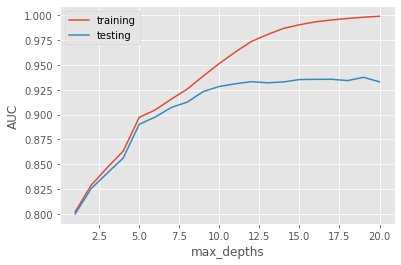

In [50]:
line_1, = plt.plot(max_depths, tr_auc, label='training')
line_2, = plt.plot(max_depths, tst_auc, label='testing')
plt.legend(handles=[line_1, line_2])
plt.ylabel('AUC')
plt.xlabel('max_depths')

Text(0.5, 0, 'Max features')

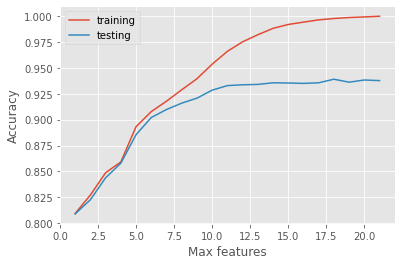

In [51]:
max_features = list(range(1,X_train.shape[1]))

tr_accuracy = []
tst_accuracy = []

tr_auc = []
tst_auc = []
for i in max_features:
    rf = RandomForestClassifier(max_depth = i)
    rf.fit(X_train,y_train.values.ravel())
    tr_pred = rf.predict(X_train)
    tr_accuracy.append(accuracy_score(y_train, tr_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, tr_pred)
    roc_auc_tr = auc(false_positive_rate, true_positive_rate)
    tr_auc.append(roc_auc_tr)
    
    
    tst_pred = rf.predict(X_test)
    tst_accuracy.append(accuracy_score(y_test, tst_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tst_pred)
    roc_auc_tst = auc(false_positive_rate, true_positive_rate)
    tst_auc.append(roc_auc_tst)

line_1, = plt.plot(max_features, tr_accuracy, label='training')
line_2, = plt.plot(max_features, tst_accuracy, label='testing')
plt.legend(handles=[line_1, line_2])
plt.ylabel('Accuracy')
plt.xlabel('Max features')

In [52]:
tst_auc

[0.7951545862645248,
 0.8126201923985419,
 0.8379940634157808,
 0.8515804057950858,
 0.881797952052294,
 0.8997402838887575,
 0.9082610282974157,
 0.9142676058573693,
 0.9195375904301114,
 0.9267822791373737,
 0.931604034216615,
 0.9322230897902695,
 0.9327822806491088,
 0.9339094304310789,
 0.9340736804630143,
 0.9329596827774809,
 0.9336320270177318,
 0.9373886890458909,
 0.9345817746713299,
 0.9364367493762202,
 0.9354315210399529]

In [53]:
#We can utilize GridSearchCV functionality to optimize the parameters

In [54]:
np.random.seed(123)
start = time.time()
#n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 400, 1000]
n_estimators = [1, 2, 4, 6, 100, 200, 500]
max_depths = (2,3,4)
boot_strap = (True, False)
min_samples_splits = [2,3,5]
min_samples_leafs = [1,5,8]
max_features = ('auto', 'sqrt', 'log2', None)
criteria = ('gini', 'entropy')
parameters = {'max_depth': max_depths,
              'bootstrap': boot_strap,
              'max_features': max_features,
              'criterion': criteria,
              'min_samples_split': min_samples_splits,
              'min_samples_leaf': min_samples_leafs
             }

rf = RandomForestClassifier(random_state=456)

#rf.fit(X_train, y_train)   # with default settings
rf_model = GridSearchCV(rf, parameters,cv = 10,n_jobs = 3)

rf_model.fit(X_train, y_train.values.ravel())
print('Best Parameters using grid search: \n', 
      rf_model.best_params_)

end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

# Set the rf to the best combination of parameters
rf = rf_model.best_estimator_

# Fit the best algorithm to the data. 
rf.fit(X_train, y_train.values.ravel())

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Time taken in grid search:  4566.76


RandomForestClassifier(criterion='entropy', max_depth=4, max_features=None,
                       random_state=456)

In [55]:
y_pred = rf.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test,y_pred))

Accuracy Score: 0.8664357197844496


In [56]:
#VALIDATE WITH K FOLD

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def run_n_splits(rf):
    kf = KFold( n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(range(len(finalpdframe))):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        rf.fit(X_train, y_train.ravel())
        predictions = rf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome))
    std_outcome = np.std(outcomes)
    print("Std Accuracy: {0}".format(std_outcome))

    
run_n_splits(rf)

Fold 1 accuracy: 0.8764434180138568
Fold 2 accuracy: 0.8614318706697459
Fold 3 accuracy: 0.8737490377213241
Fold 4 accuracy: 0.8645111624326405
Fold 5 accuracy: 0.8725943033102387
Fold 6 accuracy: 0.8737490377213241
Fold 7 accuracy: 0.8613785136696188
Fold 8 accuracy: 0.8740854832499038
Fold 9 accuracy: 0.8675394686176358
Fold 10 accuracy: 0.8613785136696188
Mean Accuracy: 0.8686860809075908
Std Accuracy: 0.00577962281160471


In [59]:
rf = RandomForestClassifier(random_state=2,max_depth=3, n_estimators=50)

rf.fit(X_train, y_train.values.ravel())# Save the model
import pickle
pickle.dump(rf,open("rf_model",'wb'))

In [60]:
# Load the model
rf_loaded = pickle.load(open('rf_model', 'rb'))
y_pred1 = rf_loaded.predict(X_test)
y_pred = rf.predict(X_test)

In [61]:
print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))  

print(accuracy_score(y_test, y_pred)) 

print(rf.score(X_test, y_test))

[[2617  348]
 [ 460 1771]]
0.844495765973826
0.844495765973826


In [62]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8382225621946767

In [63]:
rf.feature_importances_

array([0.        , 0.00188506, 0.01037346, 0.04792136, 0.14112748,
       0.00228138, 0.01946224, 0.00724146, 0.01333484, 0.263768  ,
       0.11613266, 0.16575094, 0.04314343, 0.0908624 , 0.01932793,
       0.01470407, 0.01320875, 0.02785948, 0.        , 0.00085028,
       0.00076475, 0.        ])

In [64]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Online boarding,0.263768
Inflight entertainment,0.165751
Inflight wifi service,0.141127
Seat comfort,0.116133
Leg room service,0.090862
Flight Distance,0.047921
On-board service,0.043143
Cleanliness,0.027859
Ease of Online booking,0.019462
Baggage handling,0.019328


([<matplotlib.axis.XTick at 0x1c382370>,
 [Text(0, 0, 'Online boarding'),
  Text(1, 0, 'Inflight entertainment'),
  Text(2, 0, 'Inflight wifi service'),
  Text(3, 0, 'Seat comfort'),
  Text(4, 0, 'Leg room service'),
  Text(5, 0, 'Flight Distance'),
  Text(6, 0, 'On-board service'),
  Text(7, 0, 'Cleanliness'),
  Text(8, 0, 'Ease of Online booking'),
  Text(9, 0, 'Baggage handling'),
  Text(10, 0, 'Checkin service'),
  Text(11, 0, 'Food and drink'),
  Text(12, 0, 'Inflight service'),
  Text(13, 0, 'Age'),
  Text(14, 0, 'Gate location'),
  Text(15, 0, 'Departure/Arrival time convenient'),
  Text(16, 0, 'id'),
  Text(17, 0, 'Arrival Delay in Minutes'),
  Text(18, 0, '0'),
  Text(19, 0, 'Unnamed: 0'),
  Text(20, 0, 'Departure Delay in Minutes'),
  Text(21, 0, '1')])

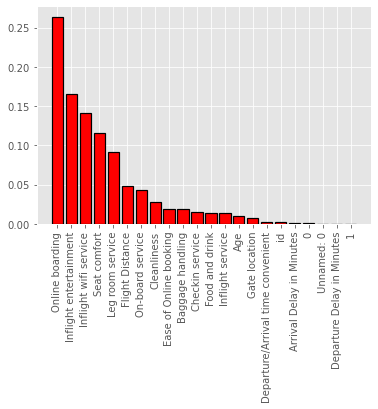

In [65]:
x_values = list(range(len(feature_importances['importance'])))
plt.bar(x_values, feature_importances['importance'], orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_importances.index, rotation='vertical')
# Axis labels and title

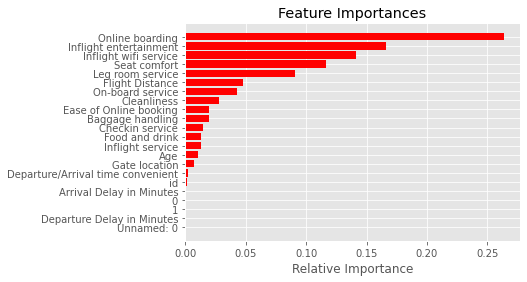

In [66]:
### Aoother way 

features = X.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [67]:
tst_auc

[0.7951545862645248,
 0.8126201923985419,
 0.8379940634157808,
 0.8515804057950858,
 0.881797952052294,
 0.8997402838887575,
 0.9082610282974157,
 0.9142676058573693,
 0.9195375904301114,
 0.9267822791373737,
 0.931604034216615,
 0.9322230897902695,
 0.9327822806491088,
 0.9339094304310789,
 0.9340736804630143,
 0.9329596827774809,
 0.9336320270177318,
 0.9373886890458909,
 0.9345817746713299,
 0.9364367493762202,
 0.9354315210399529]

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix   
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, roc_auc

ROC_AUC = 0.9361593459628734
              precision    recall  f1-score   support

           0    0.94155   0.95076   0.94613      2965
           1    0.93370   0.92156   0.92759      2231

    accuracy                        0.93822      5196
   macro avg    0.93762   0.93616   0.93686      5196
weighted avg    0.93818   0.93822   0.93817      5196



C:\Users\MONISHA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


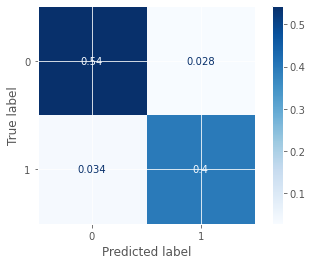

In [72]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 100,
         'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, roc_auc_rf = run_model(model_rf, X_train, y_train.values.ravel(), X_test, y_test.values.ravel())